In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
# Specify the number of nodes and time step sizes to test

def plot_file(file_name, order_guides=10, num_nodes_max_index=4, offsets=[0 for _ in range(10)]):
    num_nodes_list = [2 ** i for i in range(1, num_nodes_max_index)]
    dt_list = [2.0 ** -i for i in range(7)]
    
    # Plot the collected data
    dir_path = "heat_pySDC_monolithic_output"
    file_path = f"{dir_path}/{file_name}"
    df = pd.read_csv(file_path)
    
    # Plotting function
    fig, ax = plt.subplots()

    x = 'dt'
    y_arr = [f"{num_nodes}" for num_nodes in num_nodes_list]
    labels = [f"num_nodes = {num_nodes}" for num_nodes in num_nodes_list]
    markers = ['o', 's', 'D', '^']
    for (y, label, marker) in zip(y_arr, labels, markers):
        df.plot(x=x, y=y, label=label, marker=marker, ax=ax)

    #fig.suptitle('L2-Error vs Time Step Size', fontsize=24, y=1)
    #ax.set_title('2D Forced Heat Equation ([0, 2] x [0, 1], [0, 1])', fontsize=16)
    ax.set_xlabel(r'$\delta t$')
    ax.set_ylabel(r'$L_2$ error $\| . \|_2$')
    ax.set_xscale('log', base=2)
    ax.set_yscale('log', base=10)


    # Plot order guides into the plot

    # Set expected orders for guides
    # The expected order is the number of nodes + 1
    expected_orders = [num_nodes * 2 - 2 for num_nodes in num_nodes_list]
    linestyles = ['dotted', 'dashed', 'dashdot', 'solid']

    for i, num_nodes in enumerate(num_nodes_list):
        if i >= order_guides:
            break
        offset = offsets[i]
        dt_list_adjusted = dt_list[offset:offset+2]
        order = expected_orders[i]
        base_error = df[f"{num_nodes}"][offset]
        order_guide = [base_error / (2 ** (order*i)) for i in range(0, len(dt_list_adjusted))]
        print(order_guide)
        ax.loglog(dt_list_adjusted, order_guide, color='black', linestyle=linestyles[i], label="$\\mathcal{O}(\\delta t^{%d})$" % order)
        
    # Add legend on bottom left
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Add grid
    ax.grid()
    
    return (fig, ax)

KeyError: '16'

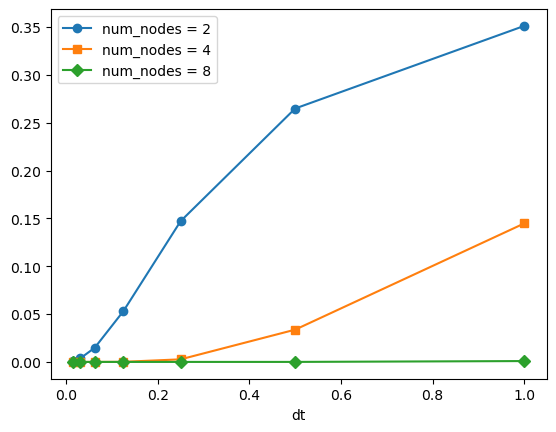

In [156]:

'''
plot_file("temp_deg_4.csv", 1, offset=2)

plot_file("temp_deg_8.csv", 2, offset=1)

plot_file("temp_deg_16.csv", offset=1)

plot_file("temp_deg_32.csv", offset=1)

plot_file("temp_deg_40.csv", num_nodes_max_index=5)
'''

plot_file("errors.csv", num_nodes_max_index=5, offsets=[5,5,5,2])

